In [ ]:
from config import *
from utils import convert_dtypes, run_recursive_feature_selection, run_permutation_feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('bmh')

In [3]:
data_for_train = pd.read_csv(cfg.paths.train_sample).pipe(convert_dtypes)
train = data_for_train[data_for_train['SAMPLE'] == 'TRAIN'].drop(columns=['SAMPLE', 'SK_ID_CURR'])
oos = data_for_train[data_for_train['SAMPLE'] == 'OOS'].drop(columns=['SAMPLE', 'SK_ID_CURR'])

X_train, y_train = train.drop(columns=['TARGET']), train['TARGET']
X_oos, y_oos = oos.drop(columns=['TARGET']), oos['TARGET']

del data_for_train, train, oos

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=cfg.seed)

In [ ]:
params = {'n_estimators': 487,
          'num_leaves': 20,
          'min_child_samples': 1653,
          'is_unbalance': False}

model = LGBMClassifier(
    boosting_type='gbdt', 
    objective='binary', 
    learning_rate=0.05, 
    verbosity=-1, 
    importance_type='gain', 
    random_state=cfg.seed, 
    **params
)

In [ ]:
nf = X_train.select_dtypes(np.number).columns
cf = X_train.select_dtypes('category').columns

result = run_recursive_feature_selection(model, X_train, y_train, X_oos, y_oos, cv, 50, nf, cf)

with open('recursive_feature_selection.pkl', 'wb') as f:
    pickle.dump(result, f)

for i, key in enumerate(result.keys()):
    if i == 0:
        result_df = pd.DataFrame([result[key]])
    else:
        result_df = pd.concat([result_df, pd.DataFrame([result[key]])])
        
result_df = result_df.reset_index(drop=True)

Features remaining: 501
CV score: 0.7865
OOS score: 0.7972
Features remaining: 290
CV score: 0.7864
OOS score: 0.7980
Features remaining: 261
CV score: 0.7866
OOS score: 0.7969
Features remaining: 234
CV score: 0.7865
OOS score: 0.7964
Features remaining: 210
CV score: 0.7865
OOS score: 0.7971
Features remaining: 189
CV score: 0.7867
OOS score: 0.7973
Features remaining: 170
CV score: 0.7867
OOS score: 0.7976
Features remaining: 153
CV score: 0.7865
OOS score: 0.7970
Features remaining: 137
CV score: 0.7865
OOS score: 0.7966
Features remaining: 123
CV score: 0.7868
OOS score: 0.7965
Features remaining: 110
CV score: 0.7858
OOS score: 0.7965
Features remaining: 99
CV score: 0.7860
OOS score: 0.7966
Features remaining: 94
CV score: 0.7859
OOS score: 0.7962
Features remaining: 89
CV score: 0.7855
OOS score: 0.7959
Features remaining: 84
CV score: 0.7849
OOS score: 0.7952
Features remaining: 79
CV score: 0.7846
OOS score: 0.7957
Features remaining: 75
CV score: 0.7847
OOS score: 0.7958
Fea

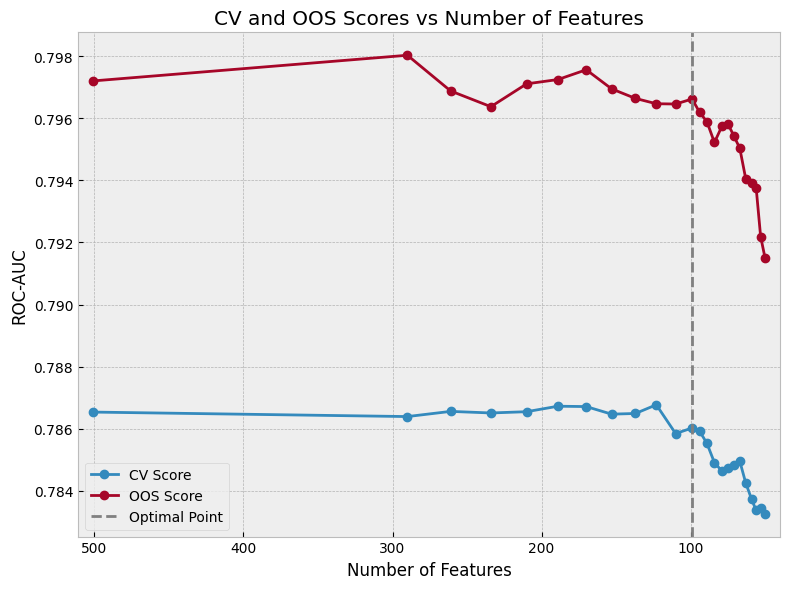

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(result_df['n_features'], result_df['cv_score'], marker='o', label='CV Score')
plt.plot(result_df['n_features'], result_df['oos_score'], marker='o', label='OOS Score')
plt.axvline(x=99, color='gray', linestyle='--', label='Optimal Point')

plt.title('CV and OOS Scores vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('ROC-AUC')
plt.xlim(result_df['n_features'].max() + 10, result_df['n_features'].min() - 10)
plt.legend()

plt.tight_layout()
plt.show()

In [208]:
result_df

,features,n_features,cv_score,cv_std,oos_score
0,"[AMT_ANNUITY, AMT_ANNUITY_to_AMT_INCOME_TOTAL,...",501,0.786531,0.003143,0.797209
1,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",290,0.786387,0.002709,0.798038
2,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",261,0.786554,0.003074,0.796886
3,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",234,0.786503,0.002622,0.796379
4,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",210,0.786544,0.002528,0.797116
5,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",189,0.786721,0.003388,0.797255
6,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",170,0.786709,0.003127,0.797570
7,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",153,0.786465,0.003241,0.796954
8,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",137,0.786486,0.002712,0.796646
9,"[EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE...",123,0.786766,0.002919,0.796474


In [ ]:
selected_features = result_df.loc[11, 'features']
X_train, X_oos = X_train[selected_features], X_oos[selected_features]

nf = X_train.select_dtypes(np.number).columns
cf = X_train.select_dtypes('category').columns

result = run_permutation_feature_selection(model, X_train, y_train, X_oos, y_oos, cv, 20, nf, cf)

with open('permutation_feature_selection.pkl', 'wb') as f:
    pickle.dump(result, f)

for i, key in enumerate(result.keys()):
    if i == 0:
        result_df = pd.DataFrame([result[key]])
    else:
        result_df = pd.concat([result_df, pd.DataFrame([result[key]])])
        
result_df = result_df.reset_index(drop=True)

Features remaining: 99
CV score: 0.7860
OOS score: 0.7966
Features remaining: 98
CV score: 0.7861
OOS score: 0.7962
Features remaining: 97
CV score: 0.7857
OOS score: 0.7963
Features remaining: 96
CV score: 0.7856
OOS score: 0.7964
Features remaining: 95
CV score: 0.7859
OOS score: 0.7966
Features remaining: 94
CV score: 0.7859
OOS score: 0.7955
Features remaining: 93
CV score: 0.7859
OOS score: 0.7969
Features remaining: 92
CV score: 0.7857
OOS score: 0.7966
Features remaining: 91
CV score: 0.7859
OOS score: 0.7965
Features remaining: 90
CV score: 0.7858
OOS score: 0.7955
Features remaining: 89
CV score: 0.7857
OOS score: 0.7955
Features remaining: 88
CV score: 0.7859
OOS score: 0.7954
Features remaining: 87
CV score: 0.7856
OOS score: 0.7960
Features remaining: 86
CV score: 0.7858
OOS score: 0.7964
Features remaining: 85
CV score: 0.7860
OOS score: 0.7958
Features remaining: 84
CV score: 0.7858
OOS score: 0.7962
Features remaining: 83
CV score: 0.7862
OOS score: 0.7966
Features remai

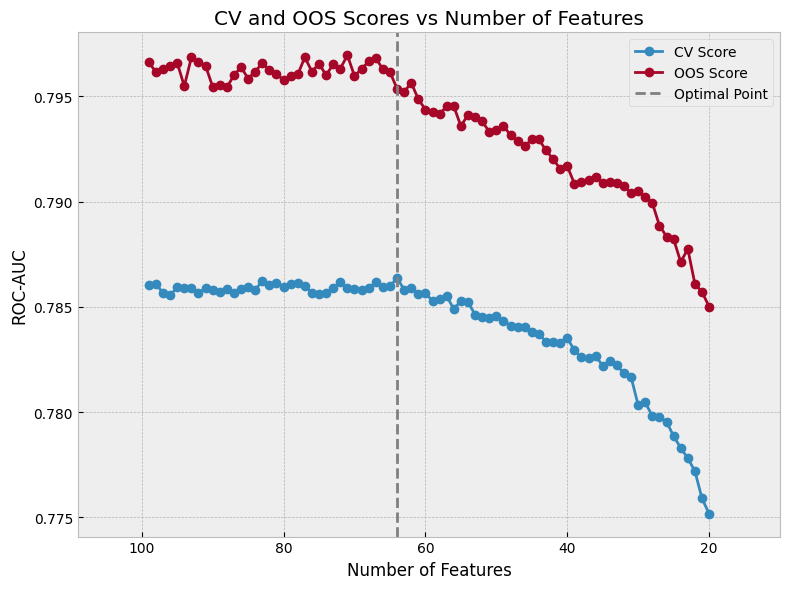

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(result_df['n_features'], result_df['cv_score'], marker='o', label='CV Score')
plt.plot(result_df['n_features'], result_df['oos_score'], marker='o', label='OOS Score')
plt.axvline(x=64, color='gray', linestyle='--', label='Optimal Point')

plt.title('CV and OOS Scores vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('ROC-AUC')
plt.xlim(result_df['n_features'].max() + 10, result_df['n_features'].min() - 10)
plt.legend()

plt.tight_layout()
plt.show()

In [233]:
result_df

,features,n_features,cv_score,cv_std,oos_score
0,"[AMT_ANNUITY, AMT_ANNUITY_to_AMT_INCOME_TOTAL,...",99,0.786019,0.003118,0.796626
1,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",98,0.786098,0.003039,0.796150
2,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",97,0.785663,0.002525,0.796285
3,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",96,0.785561,0.002833,0.796441
4,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",95,0.785925,0.002706,0.796599
5,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",94,0.785901,0.002864,0.795487
6,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",93,0.785881,0.002956,0.796851
7,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",92,0.785676,0.003055,0.796630
8,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",91,0.785894,0.002994,0.796450
9,"[EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, AMT...",90,0.785804,0.003242,0.795463


In [258]:
short_list = result_df.iloc[35]['features']